# Run scripts in cmd
and keep history


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import os

In [3]:
os.environ['DATA_DIR'] = "/home/working_directory/ml/kaggle/OpenImagesObjectDetection/input"

In [4]:
Detectron = "/home/working_directory/ml/kaggle/OpenImagesObjectDetection/detectron_source/"

In [5]:
def get_gt_bboxes_labels(image_id, annotations):
    selected_annotations = [a for a in gt_annotations if a['image_id'] == image_id]
    if len(selected_annotations) == 0:
        return []
    
    bboxes_labels = [(a['bbox'], str(a['category_id'])) for a in selected_annotations]
    return bboxes_labels

In [6]:
# !pip install --upgrade image-dataset-viz
from image_dataset_viz import render_datapoint, bbox_to_points, xywh_to_xyxy

In [7]:
def get_img_gt_target(img_path, image_id, annotations):
    img = Image.open(img_path + image_id + ".jpg")
    targets = [(bbox_to_points(xywh_to_xyxy(b)), l) for b, l in get_gt_bboxes_labels(image_id, gt_annotations)]
    return render_datapoint(img, targets, output_size=(430, 430))

## Check model overfitting on a few images

Display images

In [8]:
!ls ${DATA_DIR}/as_mscoco/train_overfit

000026e7ee790996.jpg  0002ab0af02e4a77.jpg  00045d609ca3f4eb.jpg
000062a39995e348.jpg  0002cc8afaf1b611.jpg  00068d5450f0358b.jpg
0000c64e1253d68f.jpg  0003d84e0165d630.jpg
000132c20b84269b.jpg  000411001ff7dd4f.jpg


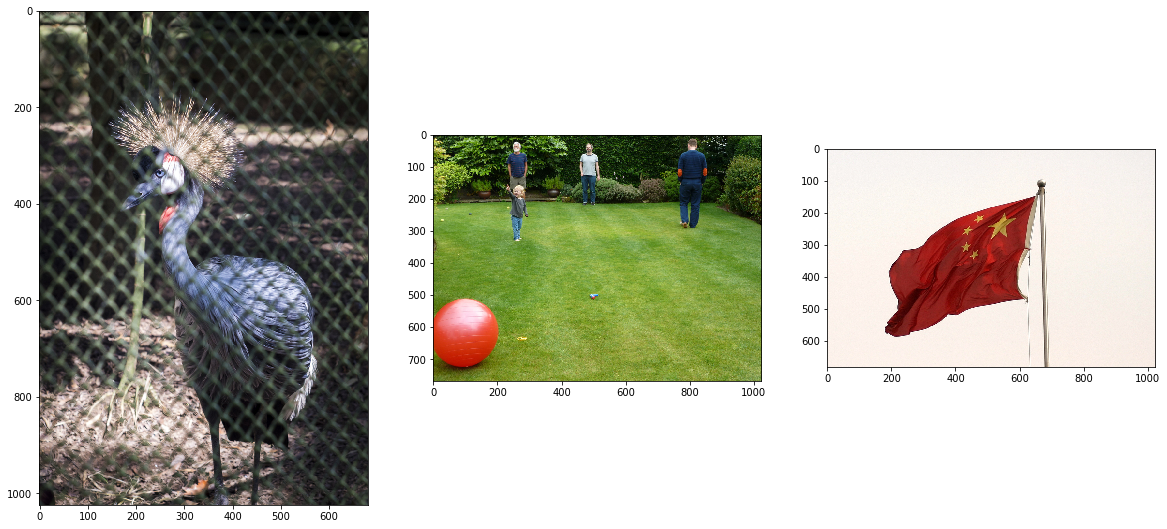

In [9]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline

path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(Image.open(path + "000062a39995e348.jpg"))

plt.subplot(132)
plt.imshow(Image.open(path + "0003d84e0165d630.jpg"))

plt.subplot(133)
plt.imshow(Image.open(path + "00068d5450f0358b.jpg"))

In [38]:
import json

gt_annotations = None
path = os.environ['DATA_DIR'] + "/as_mscoco/annotations/"

with open(path + "train_overfit.json", "r") as h:
    data = json.load(h)
    gt_annotations = data['annotations']

### Check 10 images overfitting - Faster-RCNN X

In [39]:
from datetime import datetime
now = datetime.now()

config_name = "check_faster_rcnn_X-101-64x4d-FPN_1x"
output_path = "/home/storage_ntfs_1tb/output-OpenImagesObjectDetections/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl" 

config = "configs/open_images_v4/{}.yaml".format(config_name)
other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.IMS_PER_BATCH 1 " + \
                "TRAIN.SNAPSHOT_ITERS 1000 " + \
                "SOLVER.MAX_ITER 2000 " + \
                "SOLVER.BASE_LR 0.0085 " + \
                "SOLVER.WARM_UP_ITERS 10 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 10 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 8 " + \
                "DATA_LOADER.NUM_THREADS 4"

                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!python2 {Detectron}/tools/train_net.py --cfg {config} {other_confs}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0727 05:59:35.131613 25090 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 05:59:35.132251 25090 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 05:59:35.132264 25090 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO train_net.py:  95: Called with args:
INFO train_net.py:  96: Namespace(cfg_file='configs/open_images_v4/check_faster_rcnn_X-101-64x4d-FPN_1x.yaml', multi_gpu_testing=False, opts=['NUM_GPUS', '1', 'OUTPUT_DIR', '/home/storage_ntfs_1tb/output-OpenImagesObjectDetections/check_faster_rcnn_X-101-64x4d-FPN_1x/20

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.00478601455688 secs
INFO train.py: 200: Loading dataset: ('open_images_v4_train_overfit',)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: open_images_v4_train_overfit
INFO roidb.py: 135: Filtered 0 roidb entries: 20 -> 20
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO train.py: 204: 20 roidb entries
INFO net.py:  59: Loading weights from: weights/Faster-RCNN-X-101-64x4d-FPN/model_final.pkl
INFO train.py: 188: Outputs saved to: /home/storage_ntfs_1tb/output-OpenImagesObjectDetections/check_faster_rcnn_X-101-64x4d-FPN_1x/20180727_0559/train/open_images_v4_train_overfit/generalized_rcnn
INFO loader.py: 229: Pre-filling mini-batch queue...
INFO loader.py: 234:   [0/

INFO net.py: 257: res3_1_branch2a             : (1, 512, 100, 136)   => res3_1_branch2a             : (1, 512, 100, 136)   ------- (op: Relu)
INFO net.py: 257: res3_1_branch2a             : (1, 512, 100, 136)   => res3_1_branch2b             : (1, 512, 100, 136)   ------- (op: Conv)
INFO net.py: 257: res3_1_branch2b             : (1, 512, 100, 136)   => res3_1_branch2b             : (1, 512, 100, 136)   ------- (op: AffineChannel)
INFO net.py: 257: res3_1_branch2b             : (1, 512, 100, 136)   => res3_1_branch2b             : (1, 512, 100, 136)   ------- (op: Relu)
INFO net.py: 257: res3_1_branch2b             : (1, 512, 100, 136)   => res3_1_branch2c             : (1, 512, 100, 136)   ------- (op: Conv)
INFO net.py: 257: res3_1_branch2c             : (1, 512, 100, 136)   => res3_1_branch2c_bn          : (1, 512, 100, 136)   ------- (op: AffineChannel)
INFO net.py: 257: res3_1_branch2c_bn          : (1, 512, 100, 136)   => res3_1_branch2c_bn          : (1, 512, 100, 136)   -------

INFO net.py: 257: res4_2_branch2c_bn          : (1, 1024, 50, 68)    => res4_3_branch2a             : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_3_branch2a             : (1, 1024, 50, 68)    => res4_3_branch2a             : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_3_branch2a             : (1, 1024, 50, 68)    => res4_3_branch2a             : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_3_branch2a             : (1, 1024, 50, 68)    => res4_3_branch2b             : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_3_branch2b             : (1, 1024, 50, 68)    => res4_3_branch2b             : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_3_branch2b             : (1, 1024, 50, 68)    => res4_3_branch2b             : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_3_branch2b             : (1, 1024, 50, 68)    => res4_3_branch2c             : (1, 1024, 50, 68)    -------

INFO net.py: 257: res4_8_branch2b             : (1, 1024, 50, 68)    => res4_8_branch2b             : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_8_branch2b             : (1, 1024, 50, 68)    => res4_8_branch2c             : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_8_branch2c             : (1, 1024, 50, 68)    => res4_8_branch2c_bn          : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_8_branch2c_bn          : (1, 1024, 50, 68)    => res4_8_branch2c_bn          : (1, 1024, 50, 68)    ------- (op: Sum)
INFO net.py: 257: res4_7_branch2c_bn          : (1, 1024, 50, 68)    => res4_8_branch2c_bn          : (1, 1024, 50, 68)    ------|
INFO net.py: 257: res4_8_branch2c_bn          : (1, 1024, 50, 68)    => res4_8_branch2c_bn          : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_8_branch2c_bn          : (1, 1024, 50, 68)    => res4_9_branch2a             : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.

INFO net.py: 257: res4_12_branch2c_bn         : (1, 1024, 50, 68)    => res4_13_branch2c_bn         : (1, 1024, 50, 68)    ------|
INFO net.py: 257: res4_13_branch2c_bn         : (1, 1024, 50, 68)    => res4_13_branch2c_bn         : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_13_branch2c_bn         : (1, 1024, 50, 68)    => res4_14_branch2a            : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_14_branch2a            : (1, 1024, 50, 68)    => res4_14_branch2a            : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_14_branch2a            : (1, 1024, 50, 68)    => res4_14_branch2a            : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_14_branch2a            : (1, 1024, 50, 68)    => res4_14_branch2b            : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_14_branch2b            : (1, 1024, 50, 68)    => res4_14_branch2b            : (1, 1024, 50, 68)    ------- (op: AffineChannel)

INFO net.py: 257: res4_19_branch2a            : (1, 1024, 50, 68)    => res4_19_branch2a            : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_19_branch2a            : (1, 1024, 50, 68)    => res4_19_branch2b            : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 68)    => res4_19_branch2b            : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 68)    => res4_19_branch2b            : (1, 1024, 50, 68)    ------- (op: Relu)
INFO net.py: 257: res4_19_branch2b            : (1, 1024, 50, 68)    => res4_19_branch2c            : (1, 1024, 50, 68)    ------- (op: Conv)
INFO net.py: 257: res4_19_branch2c            : (1, 1024, 50, 68)    => res4_19_branch2c_bn         : (1, 1024, 50, 68)    ------- (op: AffineChannel)
INFO net.py: 257: res4_19_branch2c_bn         : (1, 1024, 50, 68)    => res4_19_branch2c_bn         : (1, 1024, 50, 68)    -------

INFO net.py: 257: res5_1_branch2c             : (1, 2048, 25, 34)    => res5_1_branch2c_bn          : (1, 2048, 25, 34)    ------- (op: AffineChannel)
INFO net.py: 257: res5_1_branch2c_bn          : (1, 2048, 25, 34)    => res5_1_branch2c_bn          : (1, 2048, 25, 34)    ------- (op: Sum)
INFO net.py: 257: res5_0_branch2c_bn          : (1, 2048, 25, 34)    => res5_1_branch2c_bn          : (1, 2048, 25, 34)    ------|
INFO net.py: 257: res5_1_branch2c_bn          : (1, 2048, 25, 34)    => res5_1_branch2c_bn          : (1, 2048, 25, 34)    ------- (op: Relu)
INFO net.py: 257: res5_1_branch2c_bn          : (1, 2048, 25, 34)    => res5_2_branch2a             : (1, 2048, 25, 34)    ------- (op: Conv)
INFO net.py: 257: res5_2_branch2a             : (1, 2048, 25, 34)    => res5_2_branch2a             : (1, 2048, 25, 34)    ------- (op: AffineChannel)
INFO net.py: 257: res5_2_branch2a             : (1, 2048, 25, 34)    => res5_2_branch2a             : (1, 2048, 25, 34)    ------- (op: Relu)


INFO net.py: 257: conv_rpn_fpn6               : (1, 256, 13, 17)     => rpn_bbox_pred_fpn6          : (1, 12, 13, 17)      ------- (op: Conv)
INFO net.py: 257: rpn_cls_logits_fpn6         : (1, 3, 13, 17)       => rpn_cls_probs_fpn6          : (1, 3, 13, 17)       ------- (op: Sigmoid)
INFO net.py: 257: rpn_cls_probs_fpn6          : (1, 3, 13, 17)       => rpn_rois_fpn6               : (125, 5)             ------- (op: Python:GenerateProposalsOp:gpu_0/rpn_cls_probs_fpn6,gpu_0/rpn_bbox_pred_fpn6,im_info)
INFO net.py: 257: rpn_bbox_pred_fpn6          : (1, 12, 13, 17)      => rpn_rois_fpn6               : (125, 5)             ------|
INFO net.py: 257: im_info                     : (1, 3)               => rpn_rois_fpn6               : (125, 5)             ------|
INFO net.py: 257: rpn_rois_fpn2               : (1205, 5)            => rois                        : (512, 5)             ------- (op: Python:CollectAndDistributeFpnRpnProposalsOp:gpu_0/rpn_rois_fpn2,gpu_0/rpn_rois_fpn3,gpu_0/rp

INFO net.py: 257: roi_feat_shuffled           : (512, 256, 7, 7)     => roi_feat                    : (512, 256, 7, 7)     ------- (op: BatchPermutation)
INFO net.py: 257: rois_idx_restore_int32      : (512,)               => roi_feat                    : (512, 256, 7, 7)     ------|
INFO net.py: 257: roi_feat                    : (512, 256, 7, 7)     => fc6                         : (512, 1024)          ------- (op: FC)
INFO net.py: 257: fc6                         : (512, 1024)          => fc6                         : (512, 1024)          ------- (op: Relu)
INFO net.py: 257: fc6                         : (512, 1024)          => fc7                         : (512, 1024)          ------- (op: FC)
INFO net.py: 257: fc7                         : (512, 1024)          => fc7                         : (512, 1024)          ------- (op: Relu)
INFO net.py: 257: fc7                         : (512, 1024)          => cls_score                   : (512, 601)           ------- (op: FC)
INFO net.py

json_stats: {"accuracy_cls": 0.958984, "eta": "0:06:06", "iter": 220, "loss": 0.287922, "loss_bbox": 0.129196, "loss_cls": 0.115409, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.003066, "loss_rpn_bbox_fpn5": 0.000349, "loss_rpn_bbox_fpn6": 0.003570, "loss_rpn_cls_fpn2": 0.001275, "loss_rpn_cls_fpn3": 0.000696, "loss_rpn_cls_fpn4": 0.004234, "loss_rpn_cls_fpn5": 0.001944, "loss_rpn_cls_fpn6": 0.000570, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.205795}
json_stats: {"accuracy_cls": 0.971680, "eta": "0:06:02", "iter": 240, "loss": 0.320364, "loss_bbox": 0.087714, "loss_cls": 0.092332, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000533, "loss_rpn_bbox_fpn5": 0.000155, "loss_rpn_bbox_fpn6": 0.003659, "loss_rpn_cls_fpn2": 0.001021, "loss_rpn_cls_fpn3": 0.001505, "loss_rpn_cls_fpn4": 0.002005, "loss_rpn_cls_fpn5": 0.001779, "loss_rpn_cls_fpn6": 0.000427, "lr": 0.008500, "mb_qsize": 10, "mem": 53

json_stats: {"accuracy_cls": 0.985352, "eta": "0:04:56", "iter": 560, "loss": 0.120521, "loss_bbox": 0.054365, "loss_cls": 0.034371, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000497, "loss_rpn_bbox_fpn5": 0.000029, "loss_rpn_bbox_fpn6": 0.007587, "loss_rpn_cls_fpn2": 0.000383, "loss_rpn_cls_fpn3": 0.000568, "loss_rpn_cls_fpn4": 0.002936, "loss_rpn_cls_fpn5": 0.000909, "loss_rpn_cls_fpn6": 0.000531, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.206174}
json_stats: {"accuracy_cls": 0.985352, "eta": "0:04:53", "iter": 580, "loss": 0.160112, "loss_bbox": 0.069839, "loss_cls": 0.045626, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000830, "loss_rpn_bbox_fpn5": 0.000089, "loss_rpn_bbox_fpn6": 0.000917, "loss_rpn_cls_fpn2": 0.000516, "loss_rpn_cls_fpn3": 0.000445, "loss_rpn_cls_fpn4": 0.002272, "loss_rpn_cls_fpn5": 0.000823, "loss_rpn_cls_fpn6": 0.000410, "lr": 0.008500, "mb_qsize": 10, "mem": 53

json_stats: {"accuracy_cls": 0.988281, "eta": "0:03:47", "iter": 900, "loss": 0.134317, "loss_bbox": 0.034585, "loss_cls": 0.035125, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.002132, "loss_rpn_bbox_fpn5": 0.000033, "loss_rpn_bbox_fpn6": 0.006398, "loss_rpn_cls_fpn2": 0.000275, "loss_rpn_cls_fpn3": 0.000469, "loss_rpn_cls_fpn4": 0.001671, "loss_rpn_cls_fpn5": 0.000832, "loss_rpn_cls_fpn6": 0.000533, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.207158}
json_stats: {"accuracy_cls": 0.985352, "eta": "0:03:43", "iter": 920, "loss": 0.115391, "loss_bbox": 0.029315, "loss_cls": 0.038080, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000087, "loss_rpn_bbox_fpn5": 0.000094, "loss_rpn_bbox_fpn6": 0.001625, "loss_rpn_cls_fpn2": 0.000207, "loss_rpn_cls_fpn3": 0.000213, "loss_rpn_cls_fpn4": 0.001769, "loss_rpn_cls_fpn5": 0.002374, "loss_rpn_cls_fpn6": 0.000409, "lr": 0.008500, "mb_qsize": 10, "mem": 53

json_stats: {"accuracy_cls": 0.992188, "eta": "0:02:41", "iter": 1220, "loss": 0.070985, "loss_bbox": 0.028297, "loss_cls": 0.022987, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.001881, "loss_rpn_bbox_fpn5": 0.000030, "loss_rpn_bbox_fpn6": 0.000598, "loss_rpn_cls_fpn2": 0.000074, "loss_rpn_cls_fpn3": 0.000187, "loss_rpn_cls_fpn4": 0.001672, "loss_rpn_cls_fpn5": 0.001149, "loss_rpn_cls_fpn6": 0.000243, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.207303}
json_stats: {"accuracy_cls": 0.990234, "eta": "0:02:37", "iter": 1240, "loss": 0.087367, "loss_bbox": 0.023867, "loss_cls": 0.027823, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.001186, "loss_rpn_bbox_fpn5": 0.000095, "loss_rpn_bbox_fpn6": 0.003046, "loss_rpn_cls_fpn2": 0.000170, "loss_rpn_cls_fpn3": 0.000362, "loss_rpn_cls_fpn4": 0.002132, "loss_rpn_cls_fpn5": 0.000706, "loss_rpn_cls_fpn6": 0.000640, "lr": 0.008500, "mb_qsize": 10, "mem": 

json_stats: {"accuracy_cls": 0.992188, "eta": "0:01:31", "iter": 1560, "loss": 0.053059, "loss_bbox": 0.022399, "loss_cls": 0.022418, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000522, "loss_rpn_bbox_fpn5": 0.000014, "loss_rpn_bbox_fpn6": 0.000231, "loss_rpn_cls_fpn2": 0.000028, "loss_rpn_cls_fpn3": 0.000123, "loss_rpn_cls_fpn4": 0.001859, "loss_rpn_cls_fpn5": 0.000286, "loss_rpn_cls_fpn6": 0.000227, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.207346}
json_stats: {"accuracy_cls": 0.993164, "eta": "0:01:27", "iter": 1580, "loss": 0.053883, "loss_bbox": 0.016641, "loss_cls": 0.016354, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000058, "loss_rpn_bbox_fpn5": 0.000034, "loss_rpn_bbox_fpn6": 0.000427, "loss_rpn_cls_fpn2": 0.000264, "loss_rpn_cls_fpn3": 0.000190, "loss_rpn_cls_fpn4": 0.001072, "loss_rpn_cls_fpn5": 0.000300, "loss_rpn_cls_fpn6": 0.000250, "lr": 0.008500, "mb_qsize": 10, "mem": 

json_stats: {"accuracy_cls": 0.994141, "eta": "0:00:20", "iter": 1900, "loss": 0.060776, "loss_bbox": 0.011917, "loss_cls": 0.016521, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.001241, "loss_rpn_bbox_fpn5": 0.000051, "loss_rpn_bbox_fpn6": 0.001422, "loss_rpn_cls_fpn2": 0.000056, "loss_rpn_cls_fpn3": 0.000182, "loss_rpn_cls_fpn4": 0.001206, "loss_rpn_cls_fpn5": 0.000569, "loss_rpn_cls_fpn6": 0.000261, "lr": 0.008500, "mb_qsize": 10, "mem": 5311, "time": 0.207311}
json_stats: {"accuracy_cls": 0.993164, "eta": "0:00:16", "iter": 1920, "loss": 0.063549, "loss_bbox": 0.014036, "loss_cls": 0.016394, "loss_rpn_bbox_fpn2": 0.000000, "loss_rpn_bbox_fpn3": 0.000000, "loss_rpn_bbox_fpn4": 0.000171, "loss_rpn_bbox_fpn5": 0.000031, "loss_rpn_bbox_fpn6": 0.000295, "loss_rpn_cls_fpn2": 0.000064, "loss_rpn_cls_fpn3": 0.000072, "loss_rpn_cls_fpn4": 0.001018, "loss_rpn_cls_fpn5": 0.000681, "loss_rpn_cls_fpn6": 0.000159, "lr": 0.008500, "mb_qsize": 10, "mem": 

INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: 42.5
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_dataset_evaluator.py: 231: nan
INFO json_datas

 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.841
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.858
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.858
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.858
INFO json_dataset_evaluator.py: 199: Wrote json eval results to: /home/storage_ntfs_1tb/output-OpenImagesObjectDetections/check_faster_rcnn_X-101-64x4d-FPN_1x/20180727_0559/test/open_images_v4_train_overfit/generalized_rcnn/detection_results.pkl
INFO task_evaluation.py:  62: Evaluating bounding boxes is done!
INFO task_evaluation.py: 181: copypaste: Dataset: open_images_v4_train_overfit
INFO task_evaluation.py: 183: copypaste: Task: box

Run inference on train_overfitting dataset

In [40]:
inference_output_path = "{}/inference_on_train/".format(output_path)
other_confs = "--output-dir {} --image-ext jpg --output-ext png".format(inference_output_path)
input_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
weights_path = output_path + "/train/open_images_v4_train_overfit/generalized_rcnn/model_final.pkl"

!mkdir -p {inference_output_path}
!python2 {Detectron}/tools/infer_simple.py --cfg {config} {other_confs} --wts {weights_path} {input_path}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0727 06:11:56.368219 10885 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 06:11:56.368237 10885 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0727 06:11:56.368255 10885 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  40: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  59: Lo

In [41]:
!ls {inference_output_path}

000026e7ee790996.jpg.png  0002ab0af02e4a77.jpg.png  00045d609ca3f4eb.jpg.png
000062a39995e348.jpg.png  0002cc8afaf1b611.jpg.png  00068d5450f0358b.jpg.png
0000c64e1253d68f.jpg.png  0003d84e0165d630.jpg.png
000132c20b84269b.jpg.png  000411001ff7dd4f.jpg.png


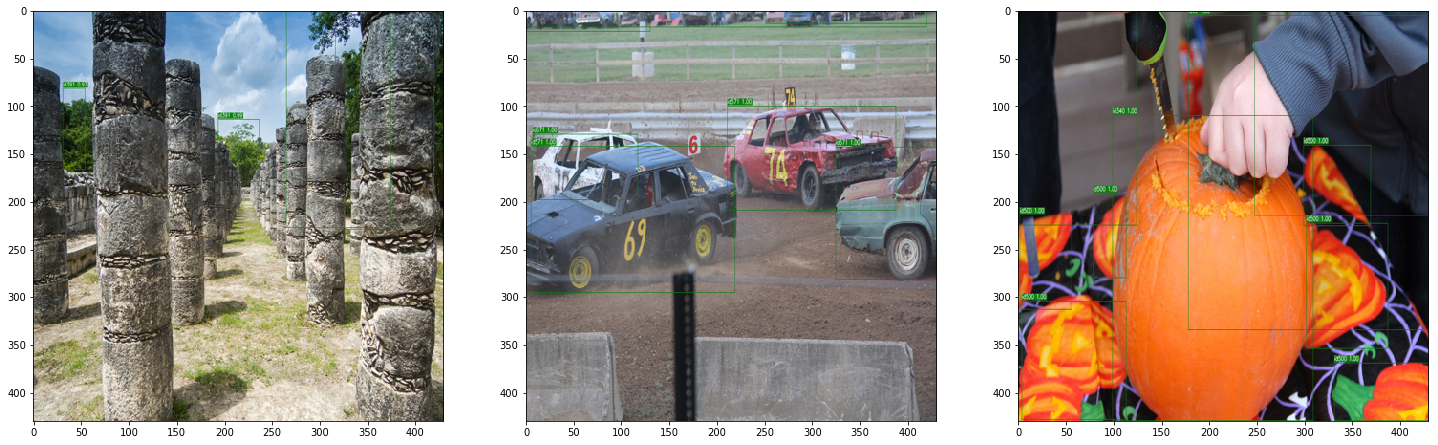

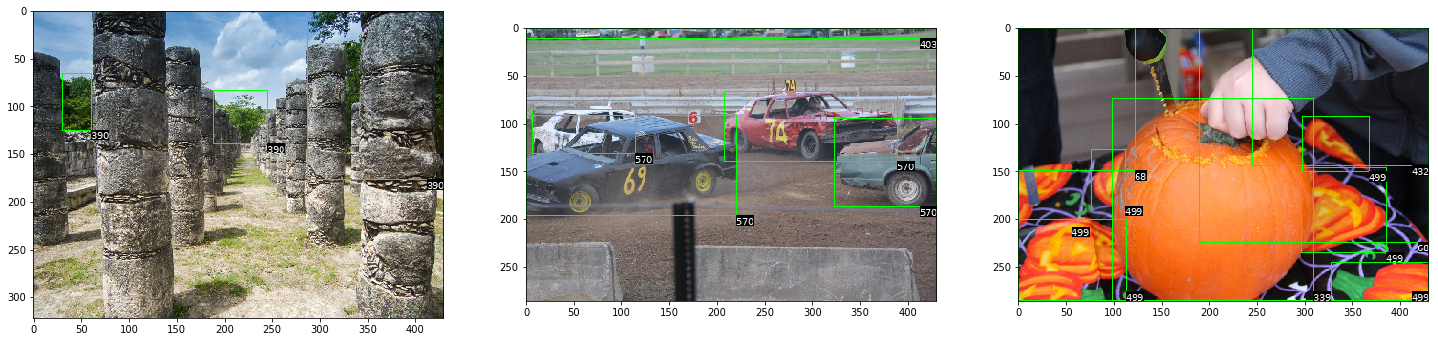

In [42]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(Image.open(inference_output_path + "000026e7ee790996.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(132)
plt.imshow(Image.open(inference_output_path + "0000c64e1253d68f.jpg.png").resize((430, 430), Image.BICUBIC))

plt.subplot(133)
plt.imshow(Image.open(inference_output_path + "00045d609ca3f4eb.jpg.png").resize((430, 430), Image.BICUBIC))


img_path = os.environ['DATA_DIR'] + "/as_mscoco/train_overfit/"
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(get_img_gt_target(img_path, "000026e7ee790996", gt_annotations))

plt.subplot(132)
plt.imshow(get_img_gt_target(img_path, "0000c64e1253d68f", gt_annotations))

plt.subplot(133)
plt.imshow(get_img_gt_target(img_path, "00045d609ca3f4eb", gt_annotations))


### Check 10 images overfitting - XView Retina p345 R50

In [94]:
from datetime import datetime
now = datetime.now()

output_path = "/home/local_data/output_xview-detectron/check_xview_retinanet_p345_R-50-FPN_1x/{}".format(now.strftime("%Y%m%d_%H%M"))
weights_path = "/home/project/ADS/xview-detectron/weights/retina_R-50.pkl" 

config = "/home/project/ADS/xview-detectron/configs/check_xview_retinanet_p345_R-50-FPN_1x.yaml"
other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.IMS_PER_BATCH 1 " + \
                "TRAIN.SNAPSHOT_ITERS 1000 " + \
                "SOLVER.MAX_ITER 3000 " + \
                "SOLVER.BASE_LR 0.0075 " + \
                "SOLVER.WARM_UP_ITERS 10 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 10 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 8 " + \
                "DATA_LOADER.NUM_THREADS 4"

                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config} {other_confs}" > {output_path}/run.cmd
!{CD} python2 tools/train_net.py --cfg {config} {other_confs}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0725 13:52:23.137442  6795 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 13:52:23.137756  6795 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 13:52:23.137766  6795 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO train_net.py:  95: Called with args:
INFO train_net.py:  96: Namespace(cfg_file='/home/project/ADS/xview-detectron/configs/check_xview_retinanet_p345_R-50-FPN_1x.yaml', multi_gpu_testing=False, opts=['NUM_GPUS', '1', 'OUTPUT_DIR', '/home/local_data/output_xview-detectron/check_xview_retinanet_p345_R-50-FPN

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.0124888420105 secs
INFO train.py: 200: Loading dataset: ('xview_tiles_512_384_train_overfitting',)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: xview_tiles_512_384_train_overfitting
INFO roidb.py: 135: Filtered 0 roidb entries: 20 -> 20
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO train.py: 204: 20 roidb entries
INFO net.py:  59: Loading weights from: /home/project/ADS/xview-detectron/weights/retina_R-50.pkl
INFO net.py:  88: fpn_inner_res5_2_sum_w not found
INFO net.py:  88: fpn_inner_res5_2_sum_b not found
INFO net.py:  88: fpn_inner_res4_5_sum_lateral_w not found
INFO net.py:  88: fpn_inner_res4_5_sum_lateral_b not found
INFO net.py:  88: fpn_inner_res3_3

INFO net.py: 249: res2_1_branch2c_bn          : (1, 256, 224, 224)   => res2_2_sum                  : (1, 256, 224, 224)   ------|
INFO net.py: 249: res2_2_sum                  : (1, 256, 224, 224)   => res2_2_sum                  : (1, 256, 224, 224)   ------- (op: Relu)
INFO net.py: 249: res2_2_sum                  : (1, 256, 224, 224)   => res2_2_sum                  : (1, 256, 224, 224)   ------- (op: StopGradient)
INFO net.py: 249: res2_2_sum                  : (1, 256, 224, 224)   => res3_0_branch2a             : (1, 128, 112, 112)   ------- (op: Conv)
INFO net.py: 249: res3_0_branch2a             : (1, 128, 112, 112)   => res3_0_branch2a             : (1, 128, 112, 112)   ------- (op: AffineChannel)
INFO net.py: 249: res3_0_branch2a             : (1, 128, 112, 112)   => res3_0_branch2a             : (1, 128, 112, 112)   ------- (op: Relu)
INFO net.py: 249: res3_0_branch2a             : (1, 128, 112, 112)   => res3_0_branch2b             : (1, 128, 112, 112)   ------- (op: Conv)


INFO net.py: 249: res4_1_branch2b             : (1, 256, 56, 56)     => res4_1_branch2b             : (1, 256, 56, 56)     ------- (op: AffineChannel)
INFO net.py: 249: res4_1_branch2b             : (1, 256, 56, 56)     => res4_1_branch2b             : (1, 256, 56, 56)     ------- (op: Relu)
INFO net.py: 249: res4_1_branch2b             : (1, 256, 56, 56)     => res4_1_branch2c             : (1, 1024, 56, 56)    ------- (op: Conv)
INFO net.py: 249: res4_1_branch2c             : (1, 1024, 56, 56)    => res4_1_branch2c_bn          : (1, 1024, 56, 56)    ------- (op: AffineChannel)
INFO net.py: 249: res4_1_branch2c_bn          : (1, 1024, 56, 56)    => res4_1_branch2c_bn          : (1, 1024, 56, 56)    ------- (op: Sum)
INFO net.py: 249: res4_0_branch2c_bn          : (1, 1024, 56, 56)    => res4_1_branch2c_bn          : (1, 1024, 56, 56)    ------|
INFO net.py: 249: res4_1_branch2c_bn          : (1, 1024, 56, 56)    => res4_1_branch2c_bn          : (1, 1024, 56, 56)    ------- (op: Relu)


INFO net.py: 249: res4_5_sum                  : (1, 1024, 56, 56)    => res5_0_branch1              : (1, 2048, 28, 28)    ------- (op: Conv)
INFO net.py: 249: res5_0_branch1              : (1, 2048, 28, 28)    => res5_0_branch1_bn           : (1, 2048, 28, 28)    ------- (op: AffineChannel)
INFO net.py: 249: res5_0_branch2c_bn          : (1, 2048, 28, 28)    => res5_0_branch2c_bn          : (1, 2048, 28, 28)    ------- (op: Sum)
INFO net.py: 249: res5_0_branch1_bn           : (1, 2048, 28, 28)    => res5_0_branch2c_bn          : (1, 2048, 28, 28)    ------|
INFO net.py: 249: res5_0_branch2c_bn          : (1, 2048, 28, 28)    => res5_0_branch2c_bn          : (1, 2048, 28, 28)    ------- (op: Relu)
INFO net.py: 249: res5_0_branch2c_bn          : (1, 2048, 28, 28)    => res5_1_branch2a             : (1, 512, 28, 28)     ------- (op: Conv)
INFO net.py: 249: res5_1_branch2a             : (1, 512, 28, 28)     => res5_1_branch2a             : (1, 512, 28, 28)     ------- (op: AffineChannel)


INFO net.py: 249: retnet_bbox_conv_n1_fpn3    : (1, 256, 112, 112)   => retnet_bbox_conv_n2_fpn3    : (1, 256, 112, 112)   ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n2_fpn3    : (1, 256, 112, 112)   => retnet_bbox_conv_n2_fpn3    : (1, 256, 112, 112)   ------- (op: Relu)
INFO net.py: 249: retnet_bbox_conv_n2_fpn3    : (1, 256, 112, 112)   => retnet_bbox_conv_n3_fpn3    : (1, 256, 112, 112)   ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n3_fpn3    : (1, 256, 112, 112)   => retnet_bbox_conv_n3_fpn3    : (1, 256, 112, 112)   ------- (op: Relu)
INFO net.py: 249: fpn_res4_5_sum              : (1, 256, 56, 56)     => retnet_bbox_conv_n0_fpn4    : (1, 256, 56, 56)     ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n0_fpn4    : (1, 256, 56, 56)     => retnet_bbox_conv_n0_fpn4    : (1, 256, 56, 56)     ------- (op: Relu)
INFO net.py: 249: retnet_bbox_conv_n0_fpn4    : (1, 256, 56, 56)     => retnet_bbox_conv_n1_fpn4    : (1, 256, 56, 56)     ------- (op: Conv)
INFO n

json_stats: {"eta": "0:06:09", "fl_fpn3": 0.218637, "fl_fpn4": 0.816212, "fl_fpn5": 0.018540, "iter": 80, "loss": 1.445404, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024378.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.053861, "retnet_loss_bbox_fpn4": 0.267085, "retnet_loss_bbox_fpn5": 0.008472, "time": 0.126474}
json_stats: {"eta": "0:06:06", "fl_fpn3": 0.232548, "fl_fpn4": 0.796165, "fl_fpn5": 0.040075, "iter": 100, "loss": 1.427344, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.032100, "retnet_loss_bbox_fpn4": 0.275791, "retnet_loss_bbox_fpn5": 0.005577, "time": 0.126508}
json_stats: {"eta": "0:06:04", "fl_fpn3": 0.192157, "fl_fpn4": 0.779234, "fl_fpn5": 0.029185, "iter": 120, "loss": 1.383618, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.040626, "retnet_loss_bbox_fpn4": 0.

json_stats: {"eta": "0:05:08", "fl_fpn3": 0.188954, "fl_fpn4": 0.651614, "fl_fpn5": 0.026140, "iter": 560, "loss": 1.213957, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024378.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.042197, "retnet_loss_bbox_fpn4": 0.250478, "retnet_loss_bbox_fpn5": 0.006988, "time": 0.126537}
json_stats: {"eta": "0:05:06", "fl_fpn3": 0.134754, "fl_fpn4": 0.666757, "fl_fpn5": 0.025674, "iter": 580, "loss": 1.181757, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.035490, "retnet_loss_bbox_fpn4": 0.251059, "retnet_loss_bbox_fpn5": 0.006594, "time": 0.126551}
json_stats: {"eta": "0:05:03", "fl_fpn3": 0.145724, "fl_fpn4": 0.648744, "fl_fpn5": 0.034937, "iter": 600, "loss": 1.176364, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024378.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.035581, "retnet_loss_bbox_fpn4": 0

json_stats: {"eta": "0:04:10", "fl_fpn3": 0.038786, "fl_fpn4": 0.293746, "fl_fpn5": 0.016860, "iter": 1020, "loss": 0.611915, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024355.000000, "retnet_fg_num": 25.500000, "retnet_loss_bbox_fpn3": 0.012056, "retnet_loss_bbox_fpn4": 0.149538, "retnet_loss_bbox_fpn5": 0.009572, "time": 0.126627}
json_stats: {"eta": "0:04:08", "fl_fpn3": 0.028541, "fl_fpn4": 0.254906, "fl_fpn5": 0.032858, "iter": 1040, "loss": 0.537309, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 21.000000, "retnet_loss_bbox_fpn3": 0.004207, "retnet_loss_bbox_fpn4": 0.111590, "retnet_loss_bbox_fpn5": 0.007663, "time": 0.126629}
json_stats: {"eta": "0:04:05", "fl_fpn3": 0.031457, "fl_fpn4": 0.228542, "fl_fpn5": 0.029376, "iter": 1060, "loss": 0.501026, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.011207, "retnet_loss_bbox_fpn4"

json_stats: {"eta": "0:03:10", "fl_fpn3": 0.004081, "fl_fpn4": 0.042958, "fl_fpn5": 0.007563, "iter": 1500, "loss": 0.088872, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.002980, "retnet_loss_bbox_fpn4": 0.022553, "retnet_loss_bbox_fpn5": 0.001227, "time": 0.126680}
json_stats: {"eta": "0:03:07", "fl_fpn3": 0.003842, "fl_fpn4": 0.055533, "fl_fpn5": 0.006228, "iter": 1520, "loss": 0.100072, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.002707, "retnet_loss_bbox_fpn4": 0.018431, "retnet_loss_bbox_fpn5": 0.002387, "time": 0.126684}
json_stats: {"eta": "0:03:04", "fl_fpn3": 0.001809, "fl_fpn4": 0.040052, "fl_fpn5": 0.005335, "iter": 1540, "loss": 0.072203, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.000843, "retnet_loss_bbox_fpn4"

json_stats: {"eta": "0:02:09", "fl_fpn3": 0.000019, "fl_fpn4": 0.002141, "fl_fpn5": 0.000431, "iter": 1980, "loss": 0.012768, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.000309, "retnet_loss_bbox_fpn4": 0.003600, "retnet_loss_bbox_fpn5": 0.000902, "time": 0.126711}
INFO net.py: 142: Saving parameters and momentum to /home/local_data/output_xview-detectron/check_xview_retinanet_p345_R-50-FPN_1x/20180725_1352/train/xview_tiles_512_384_train_overfitting/retinanet/model_iter1999.pkl
json_stats: {"eta": "0:02:06", "fl_fpn3": 0.000052, "fl_fpn4": 0.023002, "fl_fpn5": 0.000550, "iter": 2000, "loss": 0.035199, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024378.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.001055, "retnet_loss_bbox_fpn4": 0.007162, "retnet_loss_bbox_fpn5": 0.000533, "time": 0.126707}
json_stats: {"eta": "0:02:04", "fl_fpn3": 0.013900, "fl_fpn4": 0.151096,

json_stats: {"eta": "0:01:10", "fl_fpn3": 0.006836, "fl_fpn4": 0.035658, "fl_fpn5": 0.001929, "iter": 2440, "loss": 0.074983, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024378.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.000717, "retnet_loss_bbox_fpn4": 0.010402, "retnet_loss_bbox_fpn5": 0.000484, "time": 0.126721}
json_stats: {"eta": "0:01:08", "fl_fpn3": 0.002688, "fl_fpn4": 0.062116, "fl_fpn5": 0.001673, "iter": 2460, "loss": 0.082377, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.000702, "retnet_loss_bbox_fpn4": 0.006832, "retnet_loss_bbox_fpn5": 0.000404, "time": 0.126724}
json_stats: {"eta": "0:01:05", "fl_fpn3": 0.002555, "fl_fpn4": 0.037361, "fl_fpn5": 0.001549, "iter": 2480, "loss": 0.064677, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.000902, "retnet_loss_bbox_fpn4"

json_stats: {"eta": "0:00:10", "fl_fpn3": 0.000007, "fl_fpn4": 0.000131, "fl_fpn5": 0.000111, "iter": 2920, "loss": 0.001943, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.000049, "retnet_loss_bbox_fpn4": 0.000275, "retnet_loss_bbox_fpn5": 0.000195, "time": 0.126750}
json_stats: {"eta": "0:00:07", "fl_fpn3": 0.000009, "fl_fpn4": 0.000106, "fl_fpn5": 0.000142, "iter": 2940, "loss": 0.001426, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024550.500000, "retnet_fg_num": 25.000000, "retnet_loss_bbox_fpn3": 0.000123, "retnet_loss_bbox_fpn4": 0.000318, "retnet_loss_bbox_fpn5": 0.000225, "time": 0.126749}
json_stats: {"eta": "0:00:05", "fl_fpn3": 0.000005, "fl_fpn4": 0.000085, "fl_fpn5": 0.000173, "iter": 2960, "loss": 0.001763, "lr": 0.007500, "mb_qsize": 10, "mem": 2273, "retnet_bg_num": 4024473.500000, "retnet_fg_num": 23.000000, "retnet_loss_bbox_fpn3": 0.000064, "retnet_loss_bbox_fpn4"

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 501/5372 0.056s + 0.003s (eta: 0:04:48)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 511/5372 0.056s + 0.003s (eta: 0:04:47)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 521/5372 0.056s + 0.003s (eta: 0:04:47)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 531/5372 0.056s + 0.003s (eta: 0:04:46)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 541/5372 0.056s + 0.003s (eta: 0:04:45)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 551/5372 0.056s + 0.003s (eta: 0:04:45)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 561/5372 0.056s + 0.003s (eta: 0:04:44)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 571/5372 0.056s + 0.003s (eta: 0:04:43)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 581/5372 0.056s + 0.003s (eta: 0:04:43)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 591/5372 0.056s + 0.

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1311/5372 0.056s + 0.003s (eta: 0:04:00)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1321/5372 0.056s + 0.003s (eta: 0:03:59)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1331/5372 0.056s + 0.003s (eta: 0:03:59)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1341/5372 0.056s + 0.003s (eta: 0:03:58)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1351/5372 0.056s + 0.003s (eta: 0:03:57)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1361/5372 0.056s + 0.003s (eta: 0:03:57)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1371/5372 0.056s + 0.003s (eta: 0:03:56)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1381/5372 0.056s + 0.003s (eta: 0:03:56)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1391/5372 0.056s + 0.003s (eta: 0:03:55)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 1401/5372 0

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2111/5372 0.056s + 0.003s (eta: 0:03:13)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2121/5372 0.056s + 0.003s (eta: 0:03:12)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2131/5372 0.056s + 0.003s (eta: 0:03:12)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2141/5372 0.056s + 0.003s (eta: 0:03:11)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2151/5372 0.056s + 0.003s (eta: 0:03:10)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2161/5372 0.056s + 0.003s (eta: 0:03:10)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2171/5372 0.056s + 0.003s (eta: 0:03:09)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2181/5372 0.056s + 0.003s (eta: 0:03:08)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2191/5372 0.056s + 0.003s (eta: 0:03:08)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2201/5372 0

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2911/5372 0.056s + 0.003s (eta: 0:02:25)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2921/5372 0.056s + 0.003s (eta: 0:02:24)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2931/5372 0.056s + 0.003s (eta: 0:02:24)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2941/5372 0.056s + 0.003s (eta: 0:02:23)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2951/5372 0.056s + 0.003s (eta: 0:02:23)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2961/5372 0.056s + 0.003s (eta: 0:02:22)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2971/5372 0.056s + 0.003s (eta: 0:02:21)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2981/5372 0.056s + 0.003s (eta: 0:02:21)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 2991/5372 0.056s + 0.003s (eta: 0:02:20)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3001/5372 0

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3711/5372 0.056s + 0.003s (eta: 0:01:38)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3721/5372 0.056s + 0.003s (eta: 0:01:37)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3731/5372 0.056s + 0.003s (eta: 0:01:37)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3741/5372 0.056s + 0.003s (eta: 0:01:36)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3751/5372 0.056s + 0.003s (eta: 0:01:35)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3761/5372 0.056s + 0.003s (eta: 0:01:35)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3771/5372 0.056s + 0.003s (eta: 0:01:34)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3781/5372 0.056s + 0.003s (eta: 0:01:34)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3791/5372 0.056s + 0.003s (eta: 0:01:33)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 3801/5372 0

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4511/5372 0.056s + 0.003s (eta: 0:00:51)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4521/5372 0.056s + 0.003s (eta: 0:00:50)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4531/5372 0.056s + 0.003s (eta: 0:00:49)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4541/5372 0.056s + 0.003s (eta: 0:00:49)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4551/5372 0.056s + 0.003s (eta: 0:00:48)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4561/5372 0.056s + 0.003s (eta: 0:00:48)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4571/5372 0.056s + 0.003s (eta: 0:00:47)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4581/5372 0.056s + 0.003s (eta: 0:00:46)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4591/5372 0.056s + 0.003s (eta: 0:00:46)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 4601/5372 0

INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5311/5372 0.056s + 0.003s (eta: 0:00:03)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5321/5372 0.056s + 0.003s (eta: 0:00:03)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5331/5372 0.056s + 0.003s (eta: 0:00:02)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5341/5372 0.056s + 0.003s (eta: 0:00:01)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5351/5372 0.056s + 0.003s (eta: 0:00:01)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5361/5372 0.056s + 0.003s (eta: 0:00:00)
INFO test_engine.py: 287: im_detect: range [1, 5372] of 5372: 5371/5372 0.056s + 0.003s (eta: 0:00:00)
INFO test_engine.py: 320: Wrote detections to: /home/local_data/output_xview-detectron/check_xview_retinanet_p345_R-50-FPN_1x/20180725_1352/test/xview_tiles_512_384_val/retinanet/detections.pkl
INFO test_engine.py: 162: Total inference time: 344.619s
INFO task_evaluation.py:  76

Run inference on train_overfitting dataset

In [95]:
inference_output_path = "{}/inference_on_train/".format(output_path)
other_confs = "--output-dir {} --image-ext tif --output-ext png".format(inference_output_path)
input_path = "/home/local_data/xview_tiles_512_384_v1_05072018/train_overfitting/samples/102"
weights_path = output_path + "/train/xview_tiles_512_384_train_overfitting/retinanet/model_final.pkl"

!mkdir -p {inference_output_path}
!{CD} python2 tools/infer_simple.py --cfg {config} {other_confs} --wts {weights_path} {input_path}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0725 14:17:38.699787  6843 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 14:17:38.699812  6843 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 14:17:38.699816  6843 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  40: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  59: Lo

In [96]:
!ls {inference_output_path}

0_0_512_512.tif.png	0_2304_512_512.tif.png	1152_1152_512_512.tif.png
0_1152_512_512.tif.png	0_384_512_512.tif.png	1152_1536_512_512.tif.png
0_1536_512_512.tif.png	0_768_512_512.tif.png
0_1920_512_512.tif.png	1152_0_512_512.tif.png


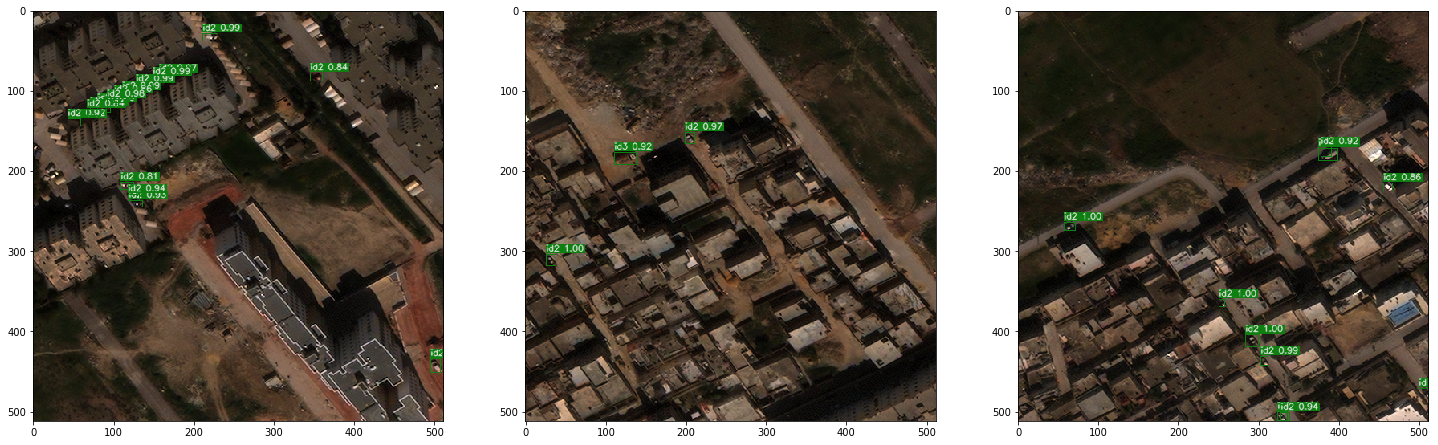

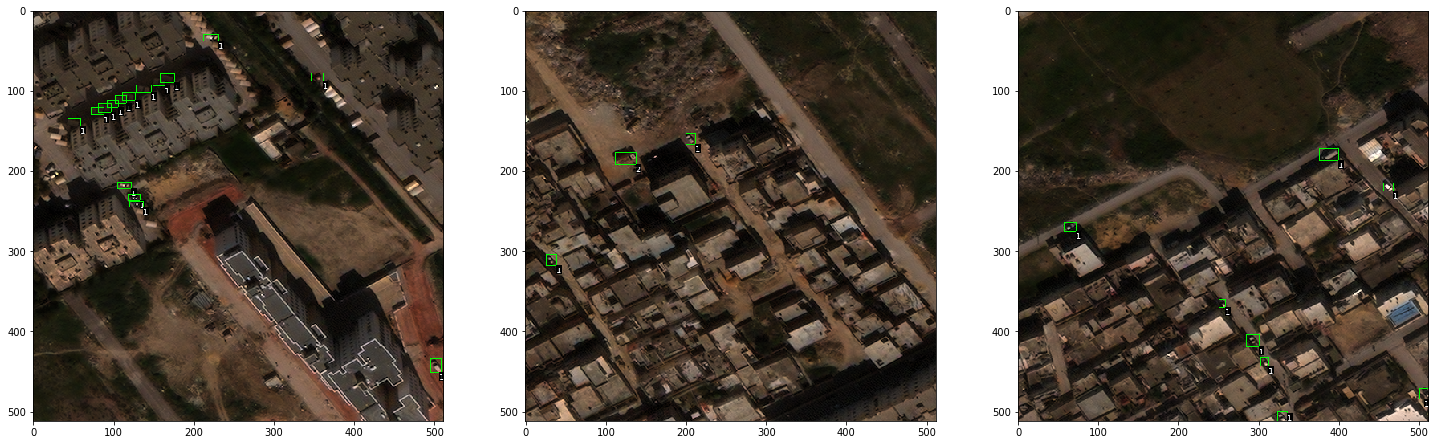

In [97]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(Image.open(inference_output_path + "0_0_512_512.tif.png"))

plt.subplot(132)
plt.imshow(Image.open(inference_output_path + "0_768_512_512.tif.png"))

plt.subplot(133)
plt.imshow(Image.open(inference_output_path + "1152_1536_512_512.tif.png"))


img_path = "/home/project/ADS/xview-detectron/detectron/detectron/datasets/data/xview_tiles_512_384/train_overfitting/samples/"
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(get_img_gt_target(img_path, "102/0_0_512_512", gt_annotations))

plt.subplot(132)
plt.imshow(get_img_gt_target(img_path, "102/0_768_512_512", gt_annotations))

plt.subplot(133)
plt.imshow(get_img_gt_target(img_path, "102/1152_1536_512_512", gt_annotations))


### Check 10 images overfitting - XView Retina p2345 R50

In [102]:
from datetime import datetime
now = datetime.now()

output_path = "/home/local_data/output_xview-detectron/check_xview_retinanet_p2345_R-50-FPN_1x/{}".format(now.strftime("%Y%m%d_%H%M"))
weights_path = "/home/project/ADS/xview-detectron/weights/retina_R-50.pkl" 

config = "/home/project/ADS/xview-detectron/configs/check_xview_retinanet_p2345_R-50-FPN_1x.yaml"
other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.IMS_PER_BATCH 2 " + \
                "TRAIN.SNAPSHOT_ITERS 1000 " + \
                "SOLVER.MAX_ITER 3000 " + \
                "SOLVER.BASE_LR 0.005 " + \
                "SOLVER.WARM_UP_ITERS 10 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 10 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 8 " + \
                "DATA_LOADER.NUM_THREADS 4"

                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --skip-test --cfg {config} {other_confs}" > {output_path}/run.cmd                
!{CD} python2 tools/train_net.py --skip-test --cfg {config} {other_confs}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0725 14:55:30.997431  7051 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 14:55:30.997750  7051 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 14:55:30.997758  7051 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO train_net.py:  95: Called with args:
INFO train_net.py:  96: Namespace(cfg_file='/home/project/ADS/xview-detectron/configs/check_xview_retinanet_p2345_R-50-FPN_1x.yaml', multi_gpu_testing=False, opts=['NUM_GPUS', '1', 'OUTPUT_DIR', '/home/local_data/output_xview-detectron/check_xview_retinanet_p2345_R-50-F

WARNING memonger.py:  70: NOTE: Executing memonger to optimize gradient memory
INFO memonger.py: 112: Memonger memory optimization took 0.0134129524231 secs
INFO train.py: 200: Loading dataset: ('xview_tiles_512_384_train_overfitting',)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
INFO roidb.py:  49: Appending horizontally-flipped training examples...
INFO roidb.py:  51: Loaded dataset: xview_tiles_512_384_train_overfitting
INFO roidb.py: 135: Filtered 0 roidb entries: 20 -> 20
INFO roidb.py:  67: Computing bounding-box regression targets...
INFO roidb.py:  69: done
INFO train.py: 204: 20 roidb entries
INFO net.py:  59: Loading weights from: /home/project/ADS/xview-detectron/weights/retina_R-50.pkl
INFO net.py:  88: fpn_inner_res5_2_sum_w not found
INFO net.py:  88: fpn_inner_res5_2_sum_b not found
INFO net.py:  88: fpn_inner_res4_5_sum_lateral_w not found
INFO net.py:  88: fpn_inner_res4_5_sum_lateral_b not found
INFO net.py:  88: fpn_inner_res3_3

INFO net.py: 249: res2_2_branch2b             : (2, 64, 224, 224)    => res2_2_branch2c             : (2, 256, 224, 224)   ------- (op: Conv)
INFO net.py: 249: res2_2_branch2c             : (2, 256, 224, 224)   => res2_2_branch2c_bn          : (2, 256, 224, 224)   ------- (op: AffineChannel)
INFO net.py: 249: res2_2_branch2c_bn          : (2, 256, 224, 224)   => res2_2_sum                  : (2, 256, 224, 224)   ------- (op: Sum)
INFO net.py: 249: res2_1_branch2c_bn          : (2, 256, 224, 224)   => res2_2_sum                  : (2, 256, 224, 224)   ------|
INFO net.py: 249: res2_2_sum                  : (2, 256, 224, 224)   => res2_2_sum                  : (2, 256, 224, 224)   ------- (op: Relu)
INFO net.py: 249: res2_2_sum                  : (2, 256, 224, 224)   => res2_2_sum                  : (2, 256, 224, 224)   ------- (op: StopGradient)
INFO net.py: 249: res2_2_sum                  : (2, 256, 224, 224)   => res3_0_branch2a             : (2, 128, 112, 112)   ------- (op: Conv)
I

INFO net.py: 249: res4_0_branch2c             : (2, 1024, 56, 56)    => res4_0_branch2c_bn          : (2, 1024, 56, 56)    ------- (op: AffineChannel)
INFO net.py: 249: res3_3_sum                  : (2, 512, 112, 112)   => res4_0_branch1              : (2, 1024, 56, 56)    ------- (op: Conv)
INFO net.py: 249: res4_0_branch1              : (2, 1024, 56, 56)    => res4_0_branch1_bn           : (2, 1024, 56, 56)    ------- (op: AffineChannel)
INFO net.py: 249: res4_0_branch2c_bn          : (2, 1024, 56, 56)    => res4_0_branch2c_bn          : (2, 1024, 56, 56)    ------- (op: Sum)
INFO net.py: 249: res4_0_branch1_bn           : (2, 1024, 56, 56)    => res4_0_branch2c_bn          : (2, 1024, 56, 56)    ------|
INFO net.py: 249: res4_0_branch2c_bn          : (2, 1024, 56, 56)    => res4_0_branch2c_bn          : (2, 1024, 56, 56)    ------- (op: Relu)
INFO net.py: 249: res4_0_branch2c_bn          : (2, 1024, 56, 56)    => res4_1_branch2a             : (2, 256, 56, 56)     ------- (op: Conv)


INFO net.py: 249: res4_5_branch2c_bn          : (2, 1024, 56, 56)    => res4_5_sum                  : (2, 1024, 56, 56)    ------- (op: Sum)
INFO net.py: 249: res4_4_branch2c_bn          : (2, 1024, 56, 56)    => res4_5_sum                  : (2, 1024, 56, 56)    ------|
INFO net.py: 249: res4_5_sum                  : (2, 1024, 56, 56)    => res4_5_sum                  : (2, 1024, 56, 56)    ------- (op: Relu)
INFO net.py: 249: res4_5_sum                  : (2, 1024, 56, 56)    => res5_0_branch2a             : (2, 512, 28, 28)     ------- (op: Conv)
INFO net.py: 249: res5_0_branch2a             : (2, 512, 28, 28)     => res5_0_branch2a             : (2, 512, 28, 28)     ------- (op: AffineChannel)
INFO net.py: 249: res5_0_branch2a             : (2, 512, 28, 28)     => res5_0_branch2a             : (2, 512, 28, 28)     ------- (op: Relu)
INFO net.py: 249: res5_0_branch2a             : (2, 512, 28, 28)     => res5_0_branch2b             : (2, 512, 28, 28)     ------- (op: Conv)
INFO net.

INFO net.py: 249: retnet_cls_conv_n1_fpn2     : (2, 256, 224, 224)   => retnet_cls_conv_n1_fpn2     : (2, 256, 224, 224)   ------- (op: Relu)
INFO net.py: 249: retnet_cls_conv_n1_fpn2     : (2, 256, 224, 224)   => retnet_cls_conv_n2_fpn2     : (2, 256, 224, 224)   ------- (op: Conv)
INFO net.py: 249: retnet_cls_conv_n2_fpn2     : (2, 256, 224, 224)   => retnet_cls_conv_n2_fpn2     : (2, 256, 224, 224)   ------- (op: Relu)
INFO net.py: 249: retnet_cls_conv_n2_fpn2     : (2, 256, 224, 224)   => retnet_cls_conv_n3_fpn2     : (2, 256, 224, 224)   ------- (op: Conv)
INFO net.py: 249: retnet_cls_conv_n3_fpn2     : (2, 256, 224, 224)   => retnet_cls_conv_n3_fpn2     : (2, 256, 224, 224)   ------- (op: Relu)
INFO net.py: 249: retnet_cls_conv_n3_fpn2     : (2, 256, 224, 224)   => retnet_cls_pred_fpn2        : (2, 99, 224, 224)    ------- (op: Conv)
INFO net.py: 249: fpn_res3_3_sum              : (2, 256, 112, 112)   => retnet_cls_conv_n0_fpn3     : (2, 256, 112, 112)   ------- (op: Conv)
INFO n

INFO net.py: 249: retnet_bbox_conv_n3_fpn2    : (2, 256, 224, 224)   => retnet_bbox_pred_fpn2       : (2, 36, 224, 224)    ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n3_fpn3    : (2, 256, 112, 112)   => retnet_bbox_pred_fpn3       : (2, 36, 112, 112)    ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n3_fpn4    : (2, 256, 56, 56)     => retnet_bbox_pred_fpn4       : (2, 36, 56, 56)      ------- (op: Conv)
INFO net.py: 249: retnet_bbox_conv_n3_fpn5    : (2, 256, 28, 28)     => retnet_bbox_pred_fpn5       : (2, 36, 28, 28)      ------- (op: Conv)
INFO net.py: 249: retnet_bbox_pred_fpn2       : (2, 36, 224, 224)    => retnet_loss_bbox_fpn2       : ()                   ------- (op: SelectSmoothL1Loss)
INFO net.py: 249: retnet_roi_bbox_targets_fpn2: (0, 4)               => retnet_loss_bbox_fpn2       : ()                   ------|
INFO net.py: 249: retnet_roi_fg_bbox_locs_fpn2: (0, 4)               => retnet_loss_bbox_fpn2       : ()                   ------|
INFO net.py: 2

json_stats: {"eta": "0:23:55", "fl_fpn2": 0.000003, "fl_fpn3": 0.224314, "fl_fpn4": 0.752155, "fl_fpn5": 0.046243, "iter": 160, "loss": 1.336137, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581848.000000, "retnet_fg_num": 55.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.067288, "retnet_loss_bbox_fpn4": 0.250285, "retnet_loss_bbox_fpn5": 0.009413, "time": 0.505473}
json_stats: {"eta": "0:23:45", "fl_fpn2": 0.000025, "fl_fpn3": 0.217285, "fl_fpn4": 0.788173, "fl_fpn5": 0.038176, "iter": 180, "loss": 1.386237, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581946.000000, "retnet_fg_num": 53.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.066311, "retnet_loss_bbox_fpn4": 0.261010, "retnet_loss_bbox_fpn5": 0.011843, "time": 0.505627}
json_stats: {"eta": "0:23:35", "fl_fpn2": 0.000088, "fl_fpn3": 0.216392, "fl_fpn4": 0.774250, "fl_fpn5": 0.033576, "iter": 200, "loss": 1.374110, "lr": 0.005000, "mb_qsize": 10, 

json_stats: {"eta": "0:20:37", "fl_fpn2": 0.000006, "fl_fpn3": 0.122087, "fl_fpn4": 0.604523, "fl_fpn5": 0.039798, "iter": 560, "loss": 1.014482, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581820.000000, "retnet_fg_num": 50.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.018726, "retnet_loss_bbox_fpn4": 0.198660, "retnet_loss_bbox_fpn5": 0.003984, "time": 0.507061}
json_stats: {"eta": "0:20:27", "fl_fpn2": 0.000003, "fl_fpn3": 0.070749, "fl_fpn4": 0.565195, "fl_fpn5": 0.038738, "iter": 580, "loss": 0.886743, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581788.000000, "retnet_fg_num": 54.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.013193, "retnet_loss_bbox_fpn4": 0.171171, "retnet_loss_bbox_fpn5": 0.004602, "time": 0.507061}
json_stats: {"eta": "0:20:16", "fl_fpn2": 0.000005, "fl_fpn3": 0.077142, "fl_fpn4": 0.442487, "fl_fpn5": 0.028005, "iter": 600, "loss": 0.758261, "lr": 0.005000, "mb_qsize": 10, 

json_stats: {"eta": "0:17:14", "fl_fpn2": 0.000002, "fl_fpn3": 0.003162, "fl_fpn4": 0.058968, "fl_fpn5": 0.005729, "iter": 960, "loss": 0.098322, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582044.000000, "retnet_fg_num": 48.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.001842, "retnet_loss_bbox_fpn4": 0.014074, "retnet_loss_bbox_fpn5": 0.003378, "time": 0.507331}
json_stats: {"eta": "0:17:04", "fl_fpn2": 0.000000, "fl_fpn3": 0.003264, "fl_fpn4": 0.042270, "fl_fpn5": 0.002765, "iter": 980, "loss": 0.083534, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582004.000000, "retnet_fg_num": 44.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.001150, "retnet_loss_bbox_fpn4": 0.017157, "retnet_loss_bbox_fpn5": 0.000987, "time": 0.507375}
INFO net.py: 142: Saving parameters and momentum to /home/local_data/output_xview-detectron/check_xview_retinanet_p2345_R-50-FPN_1x/20180725_1455/train/xview_tiles_512_384_train_

json_stats: {"eta": "0:13:52", "fl_fpn2": 0.000000, "fl_fpn3": 0.000164, "fl_fpn4": 0.007939, "fl_fpn5": 0.000081, "iter": 1360, "loss": 0.011122, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581990.000000, "retnet_fg_num": 51.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000243, "retnet_loss_bbox_fpn4": 0.001271, "retnet_loss_bbox_fpn5": 0.000176, "time": 0.507530}
json_stats: {"eta": "0:13:42", "fl_fpn2": 0.000000, "fl_fpn3": 0.000057, "fl_fpn4": 0.001591, "fl_fpn5": 0.000073, "iter": 1380, "loss": 0.002813, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582082.000000, "retnet_fg_num": 44.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000126, "retnet_loss_bbox_fpn4": 0.000633, "retnet_loss_bbox_fpn5": 0.000225, "time": 0.507541}
json_stats: {"eta": "0:13:32", "fl_fpn2": 0.000000, "fl_fpn3": 0.000069, "fl_fpn4": 0.001825, "fl_fpn5": 0.000063, "iter": 1400, "loss": 0.003209, "lr": 0.005000, "mb_qsize": 1

json_stats: {"eta": "0:10:29", "fl_fpn2": 0.000000, "fl_fpn3": 0.000112, "fl_fpn4": 0.001127, "fl_fpn5": 0.000017, "iter": 1760, "loss": 0.004619, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582016.000000, "retnet_fg_num": 40.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000268, "retnet_loss_bbox_fpn4": 0.001495, "retnet_loss_bbox_fpn5": 0.000198, "time": 0.507744}
json_stats: {"eta": "0:10:19", "fl_fpn2": 0.000000, "fl_fpn3": 0.000846, "fl_fpn4": 0.000766, "fl_fpn5": 0.000031, "iter": 1780, "loss": 0.004023, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582092.000000, "retnet_fg_num": 41.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000249, "retnet_loss_bbox_fpn4": 0.001500, "retnet_loss_bbox_fpn5": 0.000104, "time": 0.507748}
json_stats: {"eta": "0:10:09", "fl_fpn2": 0.000000, "fl_fpn3": 0.000222, "fl_fpn4": 0.002840, "fl_fpn5": 0.000023, "iter": 1800, "loss": 0.003787, "lr": 0.005000, "mb_qsize": 1

json_stats: {"eta": "0:07:06", "fl_fpn2": 0.000000, "fl_fpn3": 0.000143, "fl_fpn4": 0.014148, "fl_fpn5": 0.000282, "iter": 2160, "loss": 0.018616, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582050.000000, "retnet_fg_num": 50.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000274, "retnet_loss_bbox_fpn4": 0.002137, "retnet_loss_bbox_fpn5": 0.000131, "time": 0.507852}
json_stats: {"eta": "0:06:56", "fl_fpn2": 0.000000, "fl_fpn3": 0.000594, "fl_fpn4": 0.028914, "fl_fpn5": 0.000693, "iter": 2180, "loss": 0.039008, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32581953.000000, "retnet_fg_num": 49.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000897, "retnet_loss_bbox_fpn4": 0.005172, "retnet_loss_bbox_fpn5": 0.000329, "time": 0.507858}
json_stats: {"eta": "0:06:46", "fl_fpn2": 0.000000, "fl_fpn3": 0.000242, "fl_fpn4": 0.015553, "fl_fpn5": 0.000348, "iter": 2200, "loss": 0.024229, "lr": 0.005000, "mb_qsize": 1

json_stats: {"eta": "0:03:43", "fl_fpn2": 0.000000, "fl_fpn3": 0.000007, "fl_fpn4": 0.000152, "fl_fpn5": 0.000013, "iter": 2560, "loss": 0.000263, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582160.000000, "retnet_fg_num": 42.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000013, "retnet_loss_bbox_fpn4": 0.000034, "retnet_loss_bbox_fpn5": 0.000005, "time": 0.507896}
json_stats: {"eta": "0:03:33", "fl_fpn2": 0.000000, "fl_fpn3": 0.000005, "fl_fpn4": 0.000121, "fl_fpn5": 0.000010, "iter": 2580, "loss": 0.000241, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582086.000000, "retnet_fg_num": 40.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000012, "retnet_loss_bbox_fpn4": 0.000031, "retnet_loss_bbox_fpn5": 0.000005, "time": 0.507898}
json_stats: {"eta": "0:03:23", "fl_fpn2": 0.000000, "fl_fpn3": 0.000007, "fl_fpn4": 0.000127, "fl_fpn5": 0.000009, "iter": 2600, "loss": 0.000236, "lr": 0.005000, "mb_qsize": 1

json_stats: {"eta": "0:00:20", "fl_fpn2": 0.000000, "fl_fpn3": 0.000002, "fl_fpn4": 0.000048, "fl_fpn5": 0.000004, "iter": 2960, "loss": 0.000060, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582086.000000, "retnet_fg_num": 44.000000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000000, "retnet_loss_bbox_fpn4": 0.000002, "retnet_loss_bbox_fpn5": 0.000000, "time": 0.507958}
json_stats: {"eta": "0:00:10", "fl_fpn2": 0.000000, "fl_fpn3": 0.000003, "fl_fpn4": 0.000046, "fl_fpn5": 0.000003, "iter": 2980, "loss": 0.000056, "lr": 0.005000, "mb_qsize": 10, "mem": 5978, "retnet_bg_num": 32582056.000000, "retnet_fg_num": 42.500000, "retnet_loss_bbox_fpn2": 0.000000, "retnet_loss_bbox_fpn3": 0.000000, "retnet_loss_bbox_fpn4": 0.000002, "retnet_loss_bbox_fpn5": 0.000000, "time": 0.507949}
json_stats: {"eta": "0:00:00", "fl_fpn2": 0.000000, "fl_fpn3": 0.000002, "fl_fpn4": 0.000065, "fl_fpn5": 0.000003, "iter": 2999, "loss": 0.000100, "lr": 0.005000, "mb_qsize": 1

Run inference on train_overfitting dataset

In [103]:
inference_output_path = "{}/inference_on_train/".format(output_path)
other_confs = "--output-dir {} --image-ext tif --output-ext png".format(inference_output_path)
input_path = "/home/local_data/xview_tiles_512_384_v1_05072018/train_overfitting/samples/102"
weights_path = output_path + "/train/xview_tiles_512_384_train_overfitting/retinanet/model_final.pkl"

!mkdir -p {inference_output_path}
!{CD} python2 tools/infer_simple.py --cfg {config} {other_confs} --wts {weights_path} {input_path}

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so
E0725 15:32:22.222995  7095 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 15:32:22.223017  7095 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 15:32:22.223022  7095 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
WARNING cnn.py:  40: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprecated soon. Please use ModelHelper object with brew module. For more information, please refer to caffe2.ai and python/brew.py, python/brew_test.py for more information.
INFO net.py:  59: Lo

In [104]:
!ls {inference_output_path}

0_0_512_512.tif.png	0_2304_512_512.tif.png	1152_1152_512_512.tif.png
0_1152_512_512.tif.png	0_384_512_512.tif.png	1152_1536_512_512.tif.png
0_1536_512_512.tif.png	0_768_512_512.tif.png
0_1920_512_512.tif.png	1152_0_512_512.tif.png


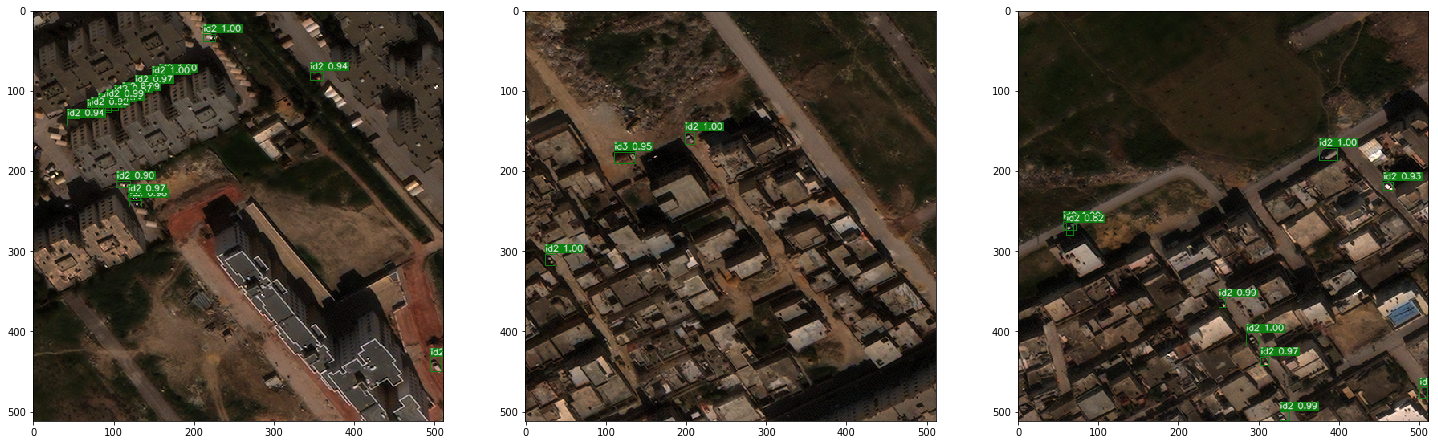

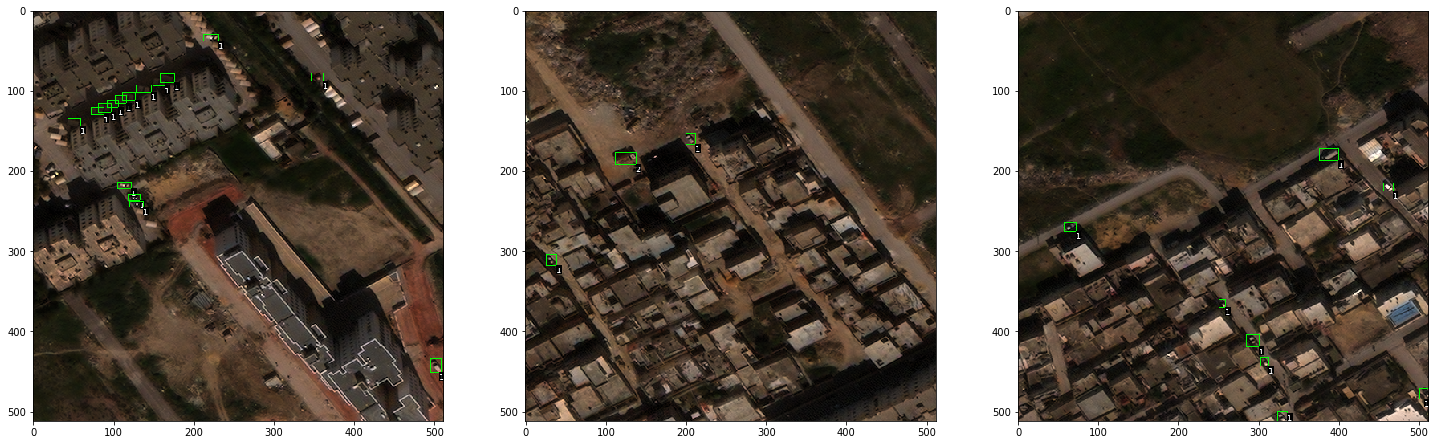

In [105]:
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(Image.open(inference_output_path + "0_0_512_512.tif.png"))

plt.subplot(132)
plt.imshow(Image.open(inference_output_path + "0_768_512_512.tif.png"))

plt.subplot(133)
plt.imshow(Image.open(inference_output_path + "1152_1536_512_512.tif.png"))


img_path = "/home/project/ADS/xview-detectron/detectron/detectron/datasets/data/xview_tiles_512_384/train_overfitting/samples/"
plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.imshow(get_img_gt_target(img_path, "102/0_0_512_512", gt_annotations))

plt.subplot(132)
plt.imshow(get_img_gt_target(img_path, "102/0_768_512_512", gt_annotations))

plt.subplot(133)
plt.imshow(get_img_gt_target(img_path, "102/1152_1536_512_512", gt_annotations))


## Train models

Training dataset contains: 23635 images

In [118]:
# !find /home/project/ADS/xview-detectron/detectron/detectron/datasets/data/xview_tiles_512_384/train/samples/*/ -name *.tif | wc -l

In [120]:
2363500

2363400

## Run training - Retina p345 R-50

In [ ]:
from datetime import datetime
now = datetime.now()


config_name = "xview_retinanet_p345_R-50-FPN_1x"
config_path = "/home/project/ADS/xview-detectron/configs/" + config_name + ".yaml"

output_path = "/home/local_data/output_xview-detectron/{}/{}".format(config_name, now.strftime("%Y%m%d_%H%M"))
weights_path = "/home/project/ADS/xview-detectron/weights/retina_R-50.pkl"


other_confs = "NUM_GPUS 1 " + \
                "OUTPUT_DIR {} ".format(output_path) + \
                "TRAIN.WEIGHTS {} ".format(weights_path) + \
                "TRAIN.SNAPSHOT_ITERS 50000 " + \
                "TRAIN.IMS_PER_BATCH 4 " + \
                "SOLVER.BASE_LR 0.005 " + \
                "SOLVER.WARM_UP_ITERS 100 " + \
                "DATA_LOADER.MINIBATCH_QUEUE_SIZE 64 " + \
                "DATA_LOADER.BLOBS_QUEUE_CAPACITY 16 " + \
                "DATA_LOADER.NUM_THREADS 4"


print("Output dir: ", output_path)                
!mkdir -p {output_path}
!echo "python2 tools/train_net.py --cfg {config_path} {other_confs}" > {output_path}/run.cmd
!{CD} python2 tools/train_net.py --cfg {config_path} {other_confs} > {output_path}/train.log

('Output dir: ', '/home/local_data/output_xview-detectron/xview_retinanet_p345_R-50-FPN_1x/20180725_1559')
E0725 15:59:27.265393  7754 init_intrinsics_check.cc:54] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 15:59:27.265717  7754 init_intrinsics_check.cc:54] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
E0725 15:59:27.265725  7754 init_intrinsics_check.cc:54] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.


In [10]:
!ls detectron/detectron/datasets/data/xview_tiles_512_384/

In [8]:
# !{CD} python2 tools/infer_simple.py \
#     --cfg configs/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml \
#     --output-dir /tmp/detectron-visualizations \
#     --image-ext jpg \
#     --wts https://s3-us-west-2.amazonaws.com/detectron/35861858/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml.02_32_51.SgT4y1cO/output/train/coco_2014_train:coco_2014_valminusminival/generalized_rcnn/model_final.pkl \
#     demo